# 00. Table of content
### 01. Importing Libraries & Dataframes
### 02. Create Histogram
### 03. Create Bar Chart
### 04. Create Line chart on Sample Data
### 05. Create Scatterplot

# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'C:\Users\krist\22.01.2024 Instacart Basket Analysis'

In [3]:
# Import last dataframe
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

### Intermediate Data Check

In [4]:
# Check for missing values
ords_prods_all.isnull().sum()

order_id                               0
user_id                                0
order_number                           0
order_day_of_week                      0
order_hour_of_day                      0
days_since_prior_order           2076096
product_id                             0
add_to_cart_order                      0
reordered                              0
product_name                           0
aisle_id                               0
department_id                          0
prices                                 0
busiest_day                            0
busiest_days                           0
busiest_period_of_day                  0
max_order                              0
loyalty_flag                           0
mean_product_price                     0
spending_flag                          0
median_days_since_prior_order          5
order_frequency_flag                   0
first_name                       1775118
last_name                              0
gender          

# 02. Create Histogram

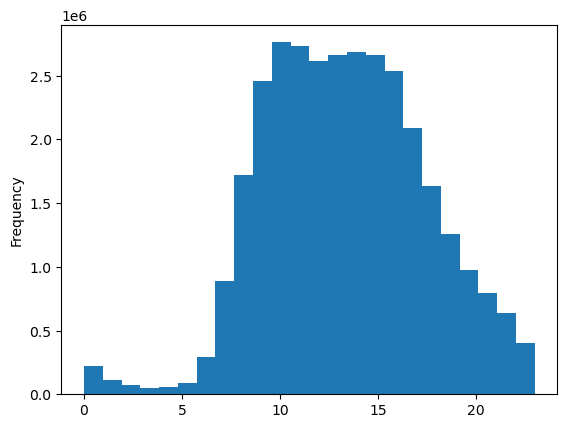

In [5]:
# Create histogram of the 'order_hour_of_day' column
histogram = ords_prods_all['order_hour_of_day'].plot.hist(bins=24)

The histogram shows that the least orders happen in the night time (as could be expected) between midnight and 6 in the morning. Most orders come in between 10.00 and 16.00 after which time the numbers drop continuously until they pick up again around 5/6 in the morning.

In [6]:
# Set axis labels and title
histogram.set_xlabel("hour of day")
histogram.set_ylabel("frequency")
histogram.set_title("Distribution of orders by hour of day")

Text(0.5, 1.0, 'Distribution of orders by hour of day')

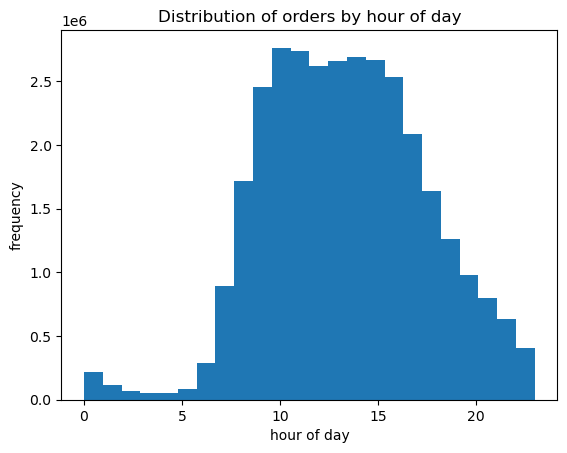

In [7]:
# Check
histogram.figure

In [8]:
# Export histogram as image file
histogram.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_4.png'))

# 03. Create Bar Chart

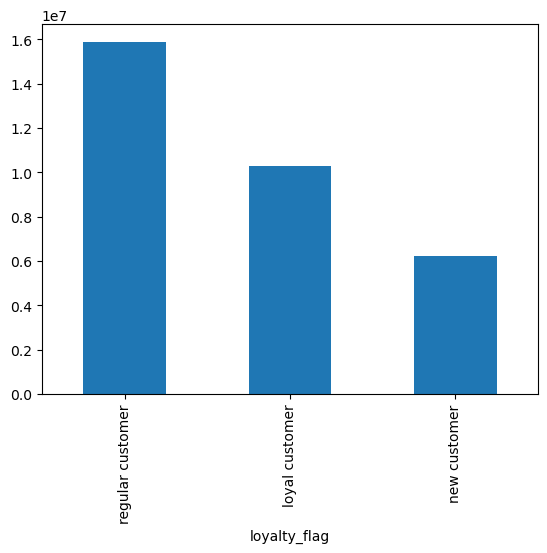

In [9]:
# Create Bar Chart on loyalty_flag
bar = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

Most orders come from regular customers, followed by loyal and new customers. Could hint to a more conservative new customer acquisition strategy (focus on profitability rather than market share acquisition) but at this point this is just a speculation.

In [10]:
# Set axis labels and title
bar.set_xlabel("customer loyalty type")
bar.set_ylabel("number of customers")
bar.set_title("Customer distribution by loyalty type")

Text(0.5, 1.0, 'Customer distribution by loyalty type')

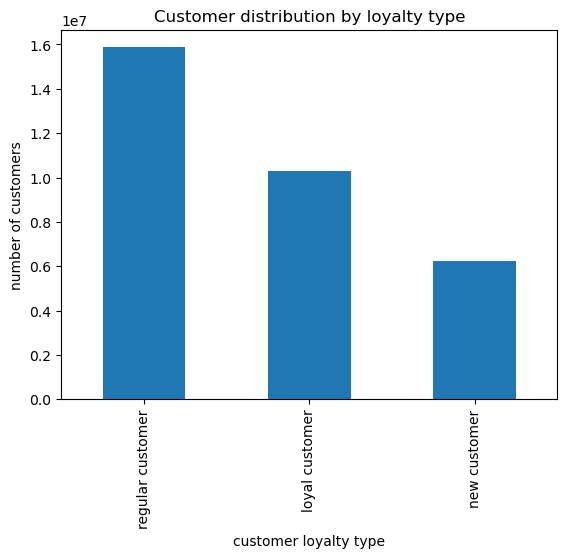

In [11]:
# Check
bar.figure

In [12]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [13]:
# Export bar chart as image file
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_5.png'), bbox_inches = 'tight')

# 04. Create Line Chart on Sample data

In [14]:
# Create sample data with a 70/30 split. Choose seed '4'. Create new list called 'dev'
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all))<=0.7

In [15]:
# Store 70% of the sample in the dataframe 'big'
big = ords_prods_all[dev]

In [16]:
# Store 30% of the sample in the dataframe 'small'
small = ords_prods_all[~dev]

In [17]:
# Check samples against entire dataframe
len(ords_prods_all)

32404859

In [18]:
len(big) + len(small)

32404859

## Is there a difference in expenditure depending on the hour of day?

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


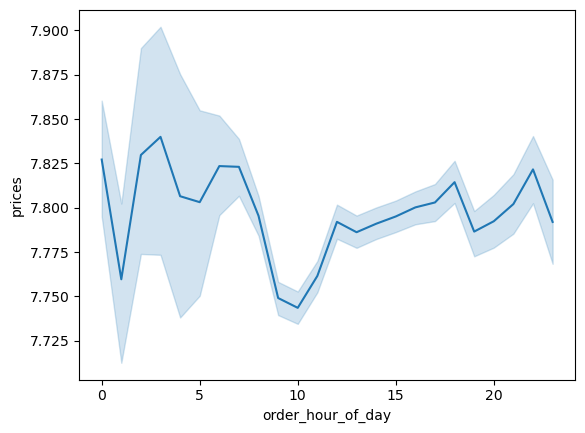

In [19]:
# Create line chart on small sample data
line_1 = sns.lineplot(data = small, x = 'order_hour_of_day', y = 'prices')

Interestingly expenditure is highest around 4am and lowest around 2am and 9-10am. However, the price only fluctuates between ~ 7.75 and 7.85. 

In [20]:
# Set axis labels and title
line_1.set_xlabel("order hour of day")
line_1.set_ylabel("product price of order")
line_1.set_title("Product price by hour of day")

Text(0.5, 1.0, 'Product price by hour of day')

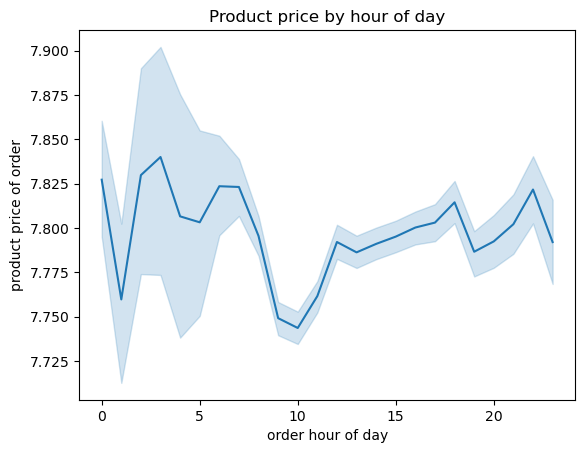

In [21]:
# Check
line_1.figure

## Is there a connection between age and number of dependants?

C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krist\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


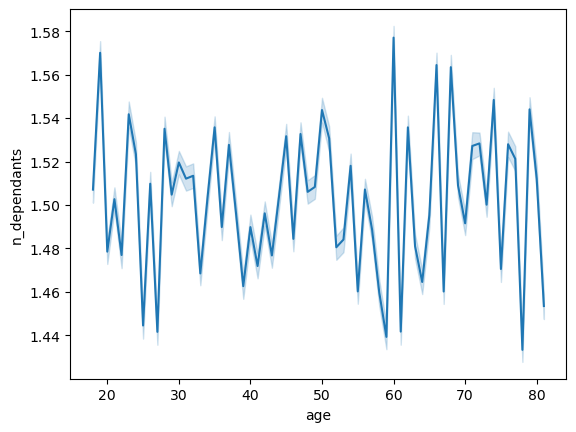

In [22]:
# Create line chart on small sample data
line_2 = sns.lineplot(data = small, x = 'age', y = 'n_dependants')

There is no clear consistent relation between age and number of dependants. The data fluctuates a lot - with a majority between 1.44 and 1.58 dependants. Generally speaking the dependants peaks are more frequent in the 60+ age segment with an exception to the 19 year olds who also score high.

In [23]:
# Set axis labels and title
line_2.set_xlabel("customer age")
line_2.set_ylabel("number of dependants")
line_2.set_title("Orders by customer age and number of dependants")

Text(0.5, 1.0, 'Orders by customer age and number of dependants')

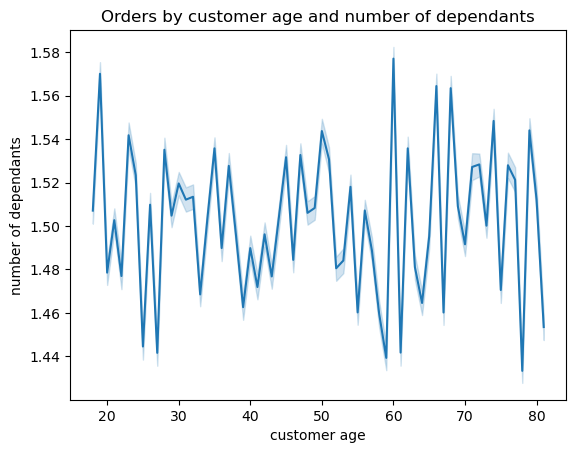

In [24]:
# Check
line_2.figure

In [25]:
# Export line_1 chart as image file
line_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_6.png'))

In [26]:
# Export line_2 chart as image file
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_7.png'))

# 05. Create Scatterplot

## Is there a connection between age and spending power (income)?

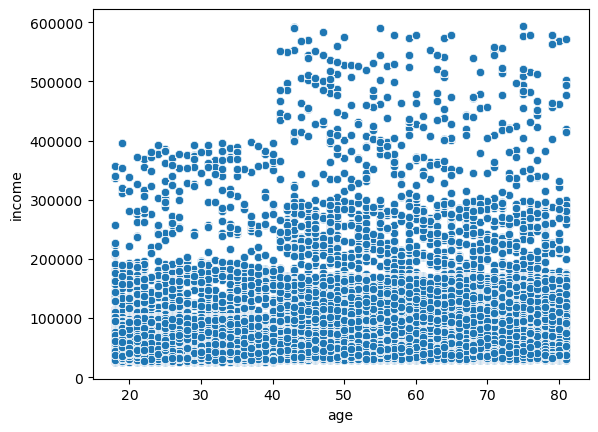

In [27]:
# Create Scatterplot for age and income columns
scatterplot = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_all)

While the majority of instacart customers have an income <200.000 UD it becomes visible in the scatterplot that there are more people in the 40+ age range that reach an income of >200.000 UD and >300.000 UD and even a few >400.000 UD which is not visible in the age range below 40 years of age.

In [31]:
# Set axis labels and title
scatterplot.set_xlabel("customer age")
scatterplot.set_ylabel("income")
scatterplot.set_title("Orders by customer age and income")

Text(0.5, 1.0, 'Orders by customer age and income')

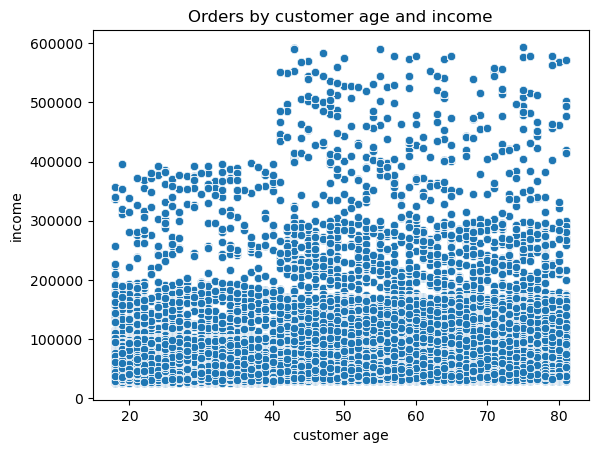

In [32]:
# Check
scatterplot.figure

In [33]:
# Export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_8.png'))